# Introduction

 Application on CV simple techniques and model ML to recognize shape 

In [2]:
# libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
%matplotlib inline 

In [3]:
# path 
path=r'E:\__Education\_College\_01 College Materials\4\1st\Computer vision\GITHUB\Projects\Shapes -ML,CV\shapes'

# Helper function

In [4]:

def imread(path):
    imbgr = cv2.imread(path)
    return cv2.cvtColor(imbgr, cv2.COLOR_BGR2RGB)  # retern img rgb


def imshow(img, figsize=(5, 5)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.show()


def rgb2gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


def rgb2bin(img):
    t, imbin = cv2.threshold(rgb2gray(img), 0, 255,cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    return imbin


def getContours_MAX(imrgb):
    imbin = rgb2bin(imrgb)
    countours, hir = cv2.findContours(
        imbin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    max_contour = max(countours, key=cv2.contourArea)
    return countours, max_contour


def drawContour(img, contours, indx=-1, color=(255, 0, 0), thk=3):
    copy = img.copy()
    cv2.drawContours(copy, contours, indx, color, thk)
    imshow(copy)


# Chain Code Histogram 

In [5]:
def chain_norm_hist(img_rgb):

    contours,best_contour = getContours_MAX(img_rgb)

    lookup_table = {
        (1, 0): 0,
        (1, -1): 1,
        (0, -1): 2,
        (-1, -1): 3,
        (-1, 0): 4,
        (-1, 1): 5,
        (0, 1): 6,
        (1, 1): 7
    }

    hist = np.zeros((8,))
    for i in range(len(best_contour)-1):
        pt1 = best_contour[i][0]
        pt2 = best_contour[i+1][0]
        dx = pt2[0] - pt1[0]
        dy = pt2[1] - pt1[1]
        code = lookup_table[(dx, dy)]
        hist[code] += 1

    return hist/hist.sum()


In [6]:

def create_df(data_path):
    # the class_dict is a mapping between class name and value
    class_dict = {
        'circle': 0,
        'square': 1,
        'star': 2,
        'triangle': 3
    }

    # we store image paths and outputs here
    df = []

    # for each class
    for class_name, class_value in class_dict.items():
        class_folder = os.path.join(data_path, class_name)
        # for each image in class folder
        for f in os.listdir(class_folder):
            f_path = os.path.join(class_folder, f)
            # if this is a "png" file, add its path and output
            if f_path.lower().endswith('.png'):
                df.append([f_path, class_value])

    # create a dataframe of image paths and outputs
    df = pd.DataFrame(df, columns=['path', 'output'])

    return df


In [7]:
dataset = create_df(path)

In [8]:
dataset

,path,output
0,E:\__Education\_College\_01 College Materials\...,0
1,E:\__Education\_College\_01 College Materials\...,0
2,E:\__Education\_College\_01 College Materials\...,0
3,E:\__Education\_College\_01 College Materials\...,0
4,E:\__Education\_College\_01 College Materials\...,0
...,...,...
14965,E:\__Education\_College\_01 College Materials\...,3
14966,E:\__Education\_College\_01 College Materials\...,3
14967,E:\__Education\_College\_01 College Materials\...,3
14968,E:\__Education\_College\_01 College Materials\...,3


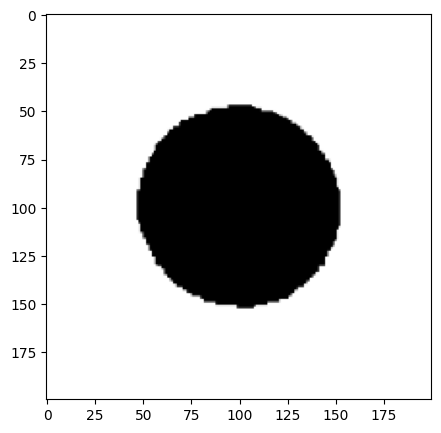

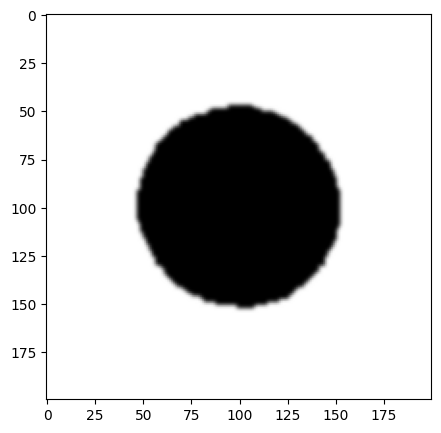

In [56]:
imgex=imread(dataset['path'][2])
# After smoothing the Sahpe 

# Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(imgex, (5,5), 0)

imshow(imgex)
imshow(blurred_image)

In [9]:
data = dataset.copy()

# Extracting features

In [35]:
from tqdm import tqdm


def extract_features(img_paths):
    n = len(img_paths)
    X = np.zeros((n, 8))
    for i in tqdm(range(n)):
        f_path = img_paths[i]
        img = imread(f_path)
        blurred = cv2.GaussianBlur(img, (5, 5), 0)  # Smoothing Edges 
        features = chain_norm_hist(blurred)
        X[i] = features
    return X



In [36]:
X = extract_features(data['path'])


100%|██████████| 14970/14970 [02:13<00:00, 112.36it/s]


In [37]:
y = data['output']


# Split data set

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


## Training

We train our Support vector machine

In [39]:
from sklearn.svm import SVC

In [40]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [42]:
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('acc of train ', accuracy_score(y_train, y_pred_train))
print('acc of test',accuracy_score(y_test, y_pred_test))


acc of train  0.96669529535261
acc of test 0.9659318637274549


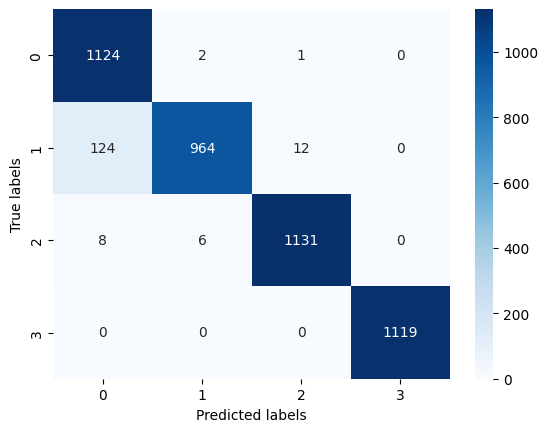

In [47]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)

# y_pred_classes = np.argmax(y_pred)
confusion_Matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_Matrix, annot=True, cmap='Blues',fmt='.5g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [48]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1127
           1       0.99      0.88      0.93      1100
           2       0.99      0.99      0.99      1145
           3       1.00      1.00      1.00      1119

    accuracy                           0.97      4491
   macro avg       0.97      0.97      0.97      4491
weighted avg       0.97      0.97      0.97      4491



# Object detection  Task
 


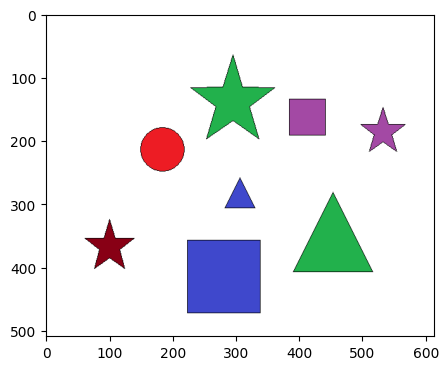

In [49]:
ImgTest_path =r'E:\__Education\_College\_01 College Materials\4\1st\Computer vision\GITHUB\Projects\Shapes -ML,CV\shapes.png'

imgTest = imread(ImgTest_path)
imshow(imgTest)

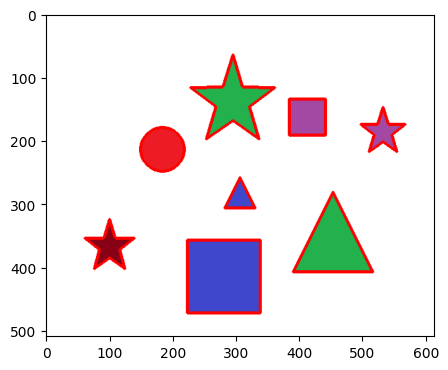

In [50]:
imTestContoures , MaxCon = getContours_MAX(imgTest)

drawContour(imgTest,imTestContoures )

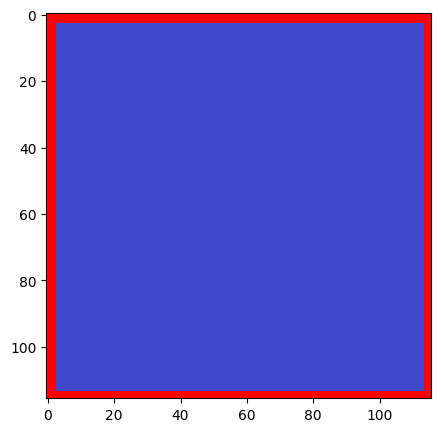

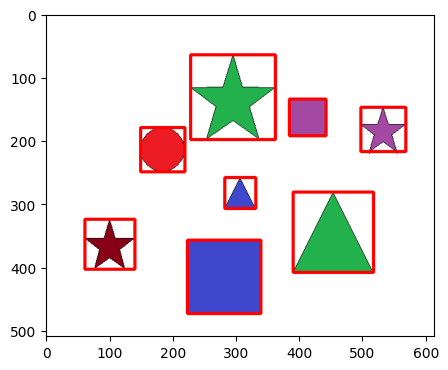

In [51]:
components = cv2.connectedComponentsWithStats(
    rgb2bin(imgTest), connectivity=4)

(nLabels, labels, stats, centroids) = components

centroids = centroids.astype(int)



# copy image to avoid drawing on the original image
img = imgTest.copy()

for i in range(1, nLabels):
    x, y, w, h, area = stats[i]
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)

# show image with locations of detected components

imshow(img[y:y+h, x:x+w])
imshow(img)

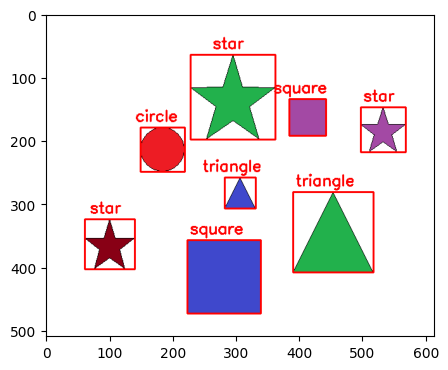

In [58]:
# creating a copy of the image
img_copy=imgTest.copy()

for contour in imTestContoures:
    x, y, w, h = cv2.boundingRect(contour)
    
    shape_area = imgTest[y:y+h, x:x+w]  
    x_features = chain_norm_hist(shape_area)  
    pred_shape = model.predict([x_features])[0]  

    cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255, 0, 0), 2)
    classes = ['circle', 'square', 'star', 'triangle']
    class_name = classes[pred_shape]

    text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0]
    text_x = x + (w - text_size[0]) // 2 
    text_y = y - 10  
    cv2.putText(img_copy, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

imshow(img_copy)